# Data Processing

## Libraries used: 
- pandas
- pickle
- numpy
- matplotlib

In [35]:
import pandas as pd
pd.set_option('display.max_columns', None)
import pickle
import numpy as np
import matplotlib.pyplot as plt

## Import data using pandas (both train and test)

Rename `(%)lymphocyte` as `lymphocyte count`  
Size of train_data_df_en = (6120, 80)  
Size of test_data_df_en = (757, 7)

In [36]:
train_data_df_en = pd.read_excel('../data/time_series_375_prerpocess_en.xlsx', index_col=[0])
print(train_data_df_en.shape)
test_data_df_en = pd.read_excel('../data/time_series_test_110_preprocess_en.xlsx', index_col=[0])
print(test_data_df_en.shape)
train_data_df_ch = pd.read_excel('../data/time_series_375_prerpocess.xlsx', index_col=[0])
print(train_data_df_ch.shape)
test_data_df_ch = pd.read_excel('../data/time_series_test_110_preprocess.xlsx', index_col=[0])
print(test_data_df_ch.shape)
# print(train_data_df_en.columns)
test_data_df_en = test_data_df_en.rename(columns={'(%)lymphocyte': 'lymphocyte count'})
test_data_df_en

(6120, 80)
(757, 7)
(6120, 80)
(757, 7)


,RE_DATE,Lactate dehydrogenase,High sensitivity C-reactive protein,lymphocyte count,Admission time,Discharge time,outcome
PATIENT_ID,,,,,,,
1,2020-02-10 11:15:00,NaN,NaN,28.0,2020-02-09 10:47:24,2020-02-21 14:51:12,0
1,2020-02-10 12:07:00,183.0,5.1,NaN,2020-02-09 10:47:24,2020-02-21 14:51:12,0
1,2020-02-13 09:35:00,NaN,NaN,28.6,2020-02-09 10:47:24,2020-02-21 14:51:12,0
1,2020-02-13 10:06:00,194.0,2.7,NaN,2020-02-09 10:47:24,2020-02-21 14:51:12,0
2,2020-02-09 06:56:00,NaN,NaN,28.3,2020-02-09 03:39:47,2020-02-21 11:57:40,0
...,...,...,...,...,...,...,...
110,2020-02-05 12:36:00,562.0,78.1,NaN,2020-02-05 00:27:57,2020-02-22 14:11:47,0
110,2020-02-11 09:40:00,NaN,NaN,9.7,2020-02-05 00:27:57,2020-02-22 14:11:47,0
110,2020-02-11 10:04:00,438.0,NaN,NaN,2020-02-05 00:27:57,2020-02-22 14:11:47,0


## Creating a translation index as most of the processing was done on the chinese dataset

In [37]:
key_translation_index = {}
columns_en=train_data_df_en.columns.values.tolist()
columns_ch=train_data_df_ch.columns.values.tolist()
columns_en
for i in range(len(columns_en)):
    key_translation_index[columns_en[i]] = columns_ch[i]
key_translation_index

{'RE_DATE': 'RE_DATE',
 'age': '年龄',
 'gender': '性别',
 'Admission time': '入院时间',
 'Discharge time': '出院时间',
 'outcome': '出院方式',
 'Hypersensitive cardiac troponinI': '高敏心肌肌钙蛋白I',
 'hemoglobin': '血红蛋白',
 'Serum chloride': '氯',
 'Prothrombin time': '凝血酶原时间',
 'procalcitonin': '降钙素原',
 'eosinophils(%)': '嗜酸细胞(%)',
 'Interleukin 2 receptor': '白细胞介素2受体',
 'Alkaline phosphatase': '碱性磷酸酶',
 'albumin': '白蛋白',
 'basophil(%)': '嗜碱细胞(%)',
 'Interleukin 10': '白细胞介素10',
 'Total bilirubin': '总胆红素',
 'Platelet count': '血小板计数',
 'monocytes(%)': '单核细胞(%)',
 'antithrombin': '抗凝血酶',
 'Interleukin 8': '白细胞介素8',
 'indirect bilirubin': '间接胆红素',
 'Red blood cell distribution width ': 'RBC分布宽度CV',
 'neutrophils(%)': '中性粒细胞(%)',
 'total protein': '总蛋白',
 'Quantification of Treponema pallidum antibodies': '梅毒螺旋体抗体定量',
 'Prothrombin activity': '凝血酶原活动度',
 'HBsAg': '乙肝表面抗原定量',
 'mean corpuscular volume': '平均RBC体积',
 'hematocrit': '红细胞压积',
 'White blood cell count': '白细胞计数',
 'Tumor necrosis factorα': '肿瘤坏死因子α',
 '

In [38]:
train_data_df_en

,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Interleukin 2 receptor,Alkaline phosphatase,albumin,basophil(%),Interleukin 10,Total bilirubin,Platelet count,monocytes(%),antithrombin,Interleukin 8,indirect bilirubin,Red blood cell distribution width,neutrophils(%),total protein,Quantification of Treponema pallidum antibodies,Prothrombin activity,HBsAg,mean corpuscular volume,hematocrit,White blood cell count,Tumor necrosis factorα,mean corpuscular hemoglobin concentration,fibrinogen,Interleukin 1β,Urea,lymphocyte count,PH value,Red blood cell count,Eosinophil count,Corrected calcium,Serum potassium,glucose,neutrophils count,Direct bilirubin,Mean platelet volume,ferritin,RBC distribution width SD,Thrombin time,(%)lymphocyte,HCV antibody quantification,D-D dimer,Total cholesterol,aspartate aminotransferase,Uric acid,HCO3-,calcium,Amino-terminal brain natriuretic peptide precursor(NT-proBNP),Lactate dehydrogenase,platelet large cell ratio,Interleukin 6,Fibrin degradation products,monocytes count,PLT distribution width,globulin,γ-glutamyl transpeptidase,International standard ratio,basophil count(#),2019-nCoV nucleic acid detection,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2020-01-31 01:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-31 01:25:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,136.0,NaN,NaN,NaN,0.6,NaN,NaN,NaN,0.3,NaN,NaN,105.0,10.7,NaN,NaN,NaN,11.9,65.8,NaN,NaN,NaN,NaN,91.8,39.2,3.54,NaN,347.0,NaN,NaN,NaN,0.80,NaN,4.27,0.02,NaN,NaN,NaN,2.33,NaN,11.9,NaN,40.8,NaN,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.9,NaN,NaN,0.38,16.3,NaN,NaN,NaN,0.01,NaN,31.9,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
1,2020-01-31 01:44:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,103.1,NaN,NaN,NaN,NaN,46.0,33.3,NaN,NaN,8.3,NaN,NaN,NaN,NaN,4.3,NaN,NaN,69.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,2.29,4.33,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,33.0,418.0,21.2,2.02,NaN,306.0,NaN,NaN,NaN,NaN,NaN,36.0,24.0,NaN,NaN,NaN,NaN,NaN,43.1,NaN,137.7,NaN,NaN,16.0,46.6,130.0
1,2020-01-31 01:45:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-31 01:56:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,NaN,NaN,NaN,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2020-02-16 11:21:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,84.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Defining Methods: 
### `is_number(s)`: Checks if s is a number or not
### `read_data_cn(fname, interval, forecast)`: reads data and performs the following operations:
- calculate `total_period = Discharge time - Admission Time`
- apply `lambda` function to convert `total_period` to days in the interval
- `period = Discharge time - RE_DATE`
- apply `lambda` function to convert `period` to days in the interval
- group data by `PATIENT_ID` and `period`
- find if patient will die in the next 24 hours
- drop `['RE_DATE', 'outcome', 'Admission time', 'Discharge time', 'total_period']`
- use columns `['PATIENT_ID', 'period','decease', 'decompensation', 'Lactate dehydrogenase', 'High sensitivity C-reactive protein', 'lymphocyte count']`

In [39]:
def is_number(s):
    if s is None:
        s = np.nan

    try:
        float(s)
        return True
    except ValueError:
        pass

    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass

    return False

def read_data_cn(fname, interval, forecast):
    """
    interval: interval of group data, days
    forecast: whether the patient will die within the next forecast hours
    """

    # read data
    data_df = fname
    # group by interval
    data_df['total_period'] = data_df['Discharge time'] - data_df['Admission time']
    # print(data_df['total_period'])
    data_df['total_period'] = data_df['total_period'].apply(lambda x: x.days//interval)
    # print('After Lambda')
    # print(data_df['total_period'])
    data_df['period'] = data_df['Discharge time'] - data_df['RE_DATE']
    # print(data_df['period'])
    data_df['period'] = data_df['period'].apply(lambda x: x.days//interval)
    # print('After Lambda')
    # print(data_df['period'])
    data_df['period'] = data_df['total_period'] - data_df['period']
    data_df = data_df.groupby(['PATIENT_ID', 'period']).last().reset_index()
    # make outcome
    decease = data_df['outcome'].values # whether the patient will die in hospital
    data_df['decease'] = decease
    decompensation = data_df['Discharge time'] - data_df['RE_DATE'] # whether the patient will die within the next 24 hours
    decompensation = decompensation.apply(lambda x: int(x.total_seconds()/3600 < forecast))
    data_df['decompensation'] = data_df['decease'] * decompensation
    # make it cleaner
    data_df = data_df.drop(['RE_DATE', 'outcome', 'Admission time', 'Discharge time', 'total_period'], axis=1)
    data_df = data_df.applymap(lambda x: x.replace('>', '').replace('<', '') if isinstance(x, str) else x)
    data_df = data_df.applymap(lambda x: x if is_number(x) else -1)
    data_df = data_df.astype(float)
    columns = ['PATIENT_ID', 'period','decease', 'decompensation', 'Lactate dehydrogenase', 'High sensitivity C-reactive protein', 'lymphocyte count']
    data_df = data_df[columns]
    return data_df

## Find `df_train` and `df_test` using interval as 3 and forecast as 72
## Linearly interpolate NaN values

In [40]:
interval = 3
forecast = 72
df_train = read_data_cn(train_data_df_en, interval, forecast)
df_test = read_data_cn(test_data_df_en, interval, forecast)

# interpolate
df_train = df_train.interpolate(method='linear').ffill().bfill() 
df_test = df_test.interpolate(method='linear').ffill().bfill() 

In [41]:
df_train

,PATIENT_ID,period,decease,decompensation,Lactate dehydrogenase,High sensitivity C-reactive protein,lymphocyte count
0,1.0,0.0,0.0,0.0,306.0,43.10,0.800000
1,1.0,1.0,0.0,0.0,278.0,23.35,1.295000
2,1.0,2.0,0.0,0.0,250.0,3.60,1.790000
3,1.0,3.0,0.0,0.0,200.0,3.10,1.320000
4,1.0,5.0,0.0,0.0,206.0,2.60,2.500000
...,...,...,...,...,...,...,...
1162,374.0,1.0,1.0,1.0,1867.0,61.70,0.330000
1163,375.0,0.0,1.0,0.0,915.0,58.50,0.510000
1164,375.0,1.0,1.0,0.0,1083.5,128.00,0.523333
1165,375.0,2.0,1.0,0.0,1252.0,197.50,0.536667


## Create Batch Data for model
- group data by `PATIENT_ID` and find decease counts for given index


In [42]:
def creat_batch_data(raw_data, outfile):

    index = raw_data.groupby(['PATIENT_ID'])['decease'].count()
    # print(index)
    index = index.sort_values().reset_index()  # sort
    index.columns = ['PATIENT_ID', 'time_length']
    # print(index.head())
    time_length_count = index.groupby(['time_length'])['PATIENT_ID'].count().reset_index()
    time_length_count.columns = ['time_length', 'count']
    print(time_length_count.head())

    batches = []
    labels = []
    intervals = []
    for length in time_length_count['time_length']:
        PID_series = index[index['time_length'] == length]['PATIENT_ID'].tolist()
        batch = []
        label = []
        interval = []
        n = 0
        for j in PID_series:
            temp = raw_data[raw_data['PATIENT_ID'] == j]
            if temp['decease'].sum() == 0:
                label.append([1, 0])  # survival[1,0] die[0,1]
            else:
                label.append([0, 1])
            features = temp.iloc[:, 4:7].values.tolist()  # 3 features
            batch.append(features)
            time = temp.iloc[:, 1].values.tolist()  # time interval
            interval.append(time)
            n += 1
            
            if n % 256 == 0:  # max 256 for a batch
                batches.append(batch)
                labels.append(label)
                batch = []
                label = []

        batches.append(batch)
        labels.append(label)
        intervals.append(interval)
    pickle.dump(batches, open('../BatchData/' + outfile + 'Data.seqs', 'wb'), -1)
    pickle.dump(labels, open('../BatchData/' + outfile + 'Label.seqs', 'wb'), -1)
    pickle.dump(intervals, open('../BatchData/' + outfile + 'Interval.seqs', 'wb'), -1)


In [43]:
creat_batch_data(df_train,'Train')
creat_batch_data(df_test,'Test')

   time_length  count
0            1     64
1            2     67
2            3     72
3            4     78
4            5     49
   time_length  count
0            1      8
1            2     42
2            3     30
3            4     13
4            5     11


In [44]:
path_string = '../BatchData/TestData.seqs'
with open(path_string,'rb') as f:
    a = pickle.load(f)

In [45]:
a[0]

[[[195.0, 0.9, 35.5]],
 [[248.0, 1.4, 19.6]],
 [[178.0, 0.9, 35.8]],
 [[166.0, 1.6, 39.2]],
 [[342.0, 2.9, 11.0]],
 [[181.0, 16.6, 23.9]],
 [[178.0, 1.0, 48.1]],
 [[186.0, 1.6, 23.2]]]

In [46]:
data_df = pd.read_excel('../data/time_series_375_prerpocess_en.xlsx', index_col=[0])
data_df.head()

,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Interleukin 2 receptor,Alkaline phosphatase,albumin,basophil(%),Interleukin 10,Total bilirubin,Platelet count,monocytes(%),antithrombin,Interleukin 8,indirect bilirubin,Red blood cell distribution width,neutrophils(%),total protein,Quantification of Treponema pallidum antibodies,Prothrombin activity,HBsAg,mean corpuscular volume,hematocrit,White blood cell count,Tumor necrosis factorα,mean corpuscular hemoglobin concentration,fibrinogen,Interleukin 1β,Urea,lymphocyte count,PH value,Red blood cell count,Eosinophil count,Corrected calcium,Serum potassium,glucose,neutrophils count,Direct bilirubin,Mean platelet volume,ferritin,RBC distribution width SD,Thrombin time,(%)lymphocyte,HCV antibody quantification,D-D dimer,Total cholesterol,aspartate aminotransferase,Uric acid,HCO3-,calcium,Amino-terminal brain natriuretic peptide precursor(NT-proBNP),Lactate dehydrogenase,platelet large cell ratio,Interleukin 6,Fibrin degradation products,monocytes count,PLT distribution width,globulin,γ-glutamyl transpeptidase,International standard ratio,basophil count(#),2019-nCoV nucleic acid detection,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2020-01-31 01:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-31 01:25:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,136.0,NaN,NaN,NaN,0.6,NaN,NaN,NaN,0.3,NaN,NaN,105.0,10.7,NaN,NaN,NaN,11.9,65.8,NaN,NaN,NaN,NaN,91.8,39.2,3.54,NaN,347.0,NaN,NaN,NaN,0.8,NaN,4.27,0.02,NaN,NaN,NaN,2.33,NaN,11.9,NaN,40.8,NaN,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.9,NaN,NaN,0.38,16.3,NaN,NaN,NaN,0.01,NaN,31.9,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
1,2020-01-31 01:44:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,103.1,NaN,NaN,NaN,NaN,46.0,33.3,NaN,NaN,8.3,NaN,NaN,NaN,NaN,4.3,NaN,NaN,69.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,2.29,4.33,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,33.0,418.0,21.2,2.02,NaN,306.0,NaN,NaN,NaN,NaN,NaN,36.0,24.0,NaN,NaN,NaN,NaN,NaN,43.1,NaN,137.7,NaN,NaN,16.0,46.6,130.0
1,2020-01-31 01:45:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-31 01:56:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,NaN,NaN,NaN,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Finding sample length

In [47]:
# sample length count
count = data_df.groupby(['PATIENT_ID'])['RE_DATE'].count().reset_index()
print(count.head())
sum_count = count.groupby(['RE_DATE']).count().reset_index()
print(sum_count.head())
sample_length = sum_count['RE_DATE'].tolist()
print(sample_length)
sample_length_count = sum_count['PATIENT_ID'].tolist()
print(sample_length_count)

   PATIENT_ID  RE_DATE
0           1       24
1           2       29
2           3       18
3           4       14
4           5       21
   RE_DATE  PATIENT_ID
0        0          14
1        1           3
2        2           1
3        4           4
4        5          11
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 39, 40, 41, 42, 47, 49, 53, 59]
[14, 3, 1, 4, 11, 11, 27, 11, 16, 17, 8, 9, 19, 17, 19, 20, 13, 20, 14, 15, 18, 7, 12, 10, 11, 5, 2, 4, 6, 4, 4, 3, 4, 1, 3, 1, 2, 1, 1, 2, 1, 2, 1, 1]


In [48]:
total = 0.0
counts = 0.0
for i in range(len(sample_length)):
    total = total + sample_length[i] * sample_length_count[i]
    counts = counts + sample_length_count[i]
print(total/counts, total)


16.282666666666668 6106.0


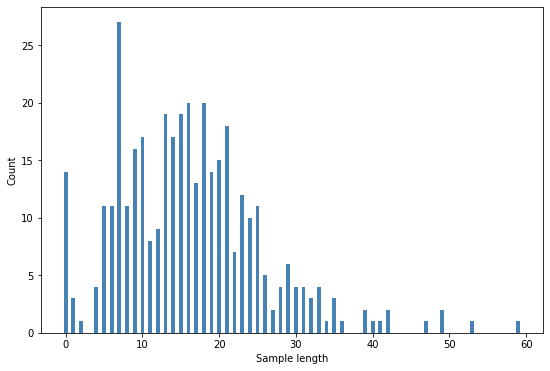

In [49]:
plt.figure(figsize=(9, 6))
plt.bar(sample_length, sample_length_count, width=0.5, color='steelblue')
plt.ylabel('Count')
plt.xlabel('Sample length')
plt.savefig('sample_length.jpg', dpi=300)
plt.show()


## Calculate the Missing Rate for 74 columns


In [50]:
# missing rate
def missing_rate(data_df):
    missing_count = 0.0
    for index, row in data_df.iterrows():
        for i in range(2, 76):
            if(np.isnan(row[i])):
                missing_count = missing_count+1
    missing_rate = missing_count / (data_df.shape[0]*74)
    return missing_rate

# group by interval


def read_data_with_interval(interval, data_df, o_columns):
    # group by interval
    a = data_df
    # print(data_df.columns)
    a['total_period'] = a['Discharge time'] - a['Admission time']
    a['total_period'] = a['total_period'].apply(lambda x: x.days//interval)
    a['period'] = a['Discharge time'] - a['RE_DATE']
    a['period'] = a['period'].apply(lambda x: x.days//interval)
    a['period'] = a['total_period'] - a['period']
    a = a.groupby(['PATIENT_ID', 'period']).last().reset_index()
    # make it cleaner
    # a = a.drop(['RE_DATE', 'outcome', 'Admission time', 'Discharge time', 'total_period'], axis=1)
    columns = ['PATIENT_ID', 'period']
    columns.extend(o_columns)
    a = a[columns]
    return a


In [51]:
o_columns = data_df.columns.values.tolist()[6:]
mrs = []
for i in range(1, 8):
    df = read_data_with_interval(i, data_df, o_columns)
    mr = missing_rate(df)
    mrs.append(mr)


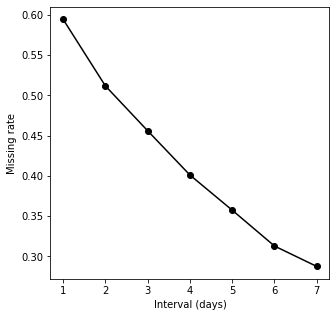

In [54]:
x=[1,2,3,4,5,6,7]
plt.figure(figsize=(5,5))
plt.plot(x,mrs,c='black',marker='o')
plt.xlabel('Interval (days)')
plt.ylabel('Missing rate')
#plt.gca().set_ylim(0,1)
plt.savefig('missing_rate.jpg', dpi=300)

In [58]:
data_df = pd.read_excel('../data/time_series_375_prerpocess_en.xlsx', index_col=[0])

In [61]:
missing_count = [0.0]*74
for index, row in data_df.iterrows():
    for i in range(6, 80):
        if(np.isnan(row[i])):
            missing_count[i-6] = missing_count[i-6]+1
feature_missing_rate = [a/data_df.shape[0] for a in missing_count]


In [63]:
o_columns=data_df.columns.values.tolist()[6:]
feature_missing_rate_df = pd.DataFrame(columns =o_columns)
feature_missing_rate_df.loc[0]= feature_missing_rate

In [65]:
feature_missing_rate_df

,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Interleukin 2 receptor,Alkaline phosphatase,albumin,basophil(%),Interleukin 10,Total bilirubin,Platelet count,monocytes(%),antithrombin,Interleukin 8,indirect bilirubin,Red blood cell distribution width,neutrophils(%),total protein,Quantification of Treponema pallidum antibodies,Prothrombin activity,HBsAg,mean corpuscular volume,hematocrit,White blood cell count,Tumor necrosis factorα,mean corpuscular hemoglobin concentration,fibrinogen,Interleukin 1β,Urea,lymphocyte count,PH value,Red blood cell count,Eosinophil count,Corrected calcium,Serum potassium,glucose,neutrophils count,Direct bilirubin,Mean platelet volume,ferritin,RBC distribution width SD,Thrombin time,(%)lymphocyte,HCV antibody quantification,D-D dimer,Total cholesterol,aspartate aminotransferase,Uric acid,HCO3-,calcium,Amino-terminal brain natriuretic peptide precursor(NT-proBNP),Lactate dehydrogenase,platelet large cell ratio,Interleukin 6,Fibrin degradation products,monocytes count,PLT distribution width,globulin,γ-glutamyl transpeptidase,International standard ratio,basophil count(#),2019-nCoV nucleic acid detection,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,0.917157,0.840686,0.840686,0.89183,0.925,0.843627,0.956209,0.848039,0.847386,0.843627,0.956373,0.848039,0.843627,0.843464,0.946078,0.956209,0.851961,0.849183,0.843627,0.847876,0.954412,0.89232,0.954412,0.843627,0.843627,0.81585,0.956209,0.843627,0.907516,0.956209,0.847059,0.843627,0.937255,0.81585,0.843627,0.850654,0.839869,0.873366,0.843627,0.848039,0.85915,0.953758,0.849183,0.907516,0.843464,0.954412,0.897059,0.847876,0.847222,0.847386,0.847386,0.840033,0.922386,0.847386,0.85915,0.955556,0.946078,0.843627,0.85915,0.848039,0.848039,0.89232,0.843627,0.918137,0.843627,0.90719,0.879575,0.954575,0.840686,0.85915,0.937418,0.847876,0.847059,0.847059


In [67]:
def feature_missing_rate_byinterval(df):
    missing_count = [0.0]*74
    for index, row in df.iterrows():
        for i in range(2, 76):
            if(np.isnan(row[i])):
                missing_count[i-2] = missing_count[i-2]+1
    feature_missing_rate = [a/df.shape[0] for a in missing_count]
    return feature_missing_rate


In [68]:
o_columns=data_df.columns.values.tolist()[6:]
fmrs=[]
# feature_missing_rate = []
for i in range(1,8):
    df=read_data_with_interval(i,data_df,o_columns)
    mr=feature_missing_rate_byinterval(df)
    # print(mr)
    fmrs.append(mr)
# feature_missing_rate.append(fmrs)
# feature_missing_rate
len(fmrs)

7

In [72]:
o_columns = data_df.columns.values.tolist()[6:-2]
feature_missing_rate_df = pd.DataFrame(columns=o_columns)
print(len(o_columns))
for i in range(len(fmrs)):
    feature_missing_rate_df.loc[i] = fmrs[i]
    print(fmrs[i])


74
[0.7270705947748749, 0.481378543635353, 0.48082267926625905, 0.6414674819344081, 0.745414118954975, 0.4830461367426348, 0.8543635352973874, 0.4974986103390773, 0.4952751528627015, 0.4830461367426348, 0.8549193996664813, 0.4974986103390773, 0.4830461367426348, 0.48249027237354086, 0.8221234018899388, 0.8543635352973874, 0.5097276264591439, 0.5013896609227348, 0.4830461367426348, 0.4974986103390773, 0.8449138410227904, 0.6431350750416899, 0.8449138410227904, 0.4830461367426348, 0.4830461367426348, 0.4330183435241801, 0.8543635352973874, 0.4830461367426348, 0.6942745969983324, 0.8543635352973874, 0.49583101723179546, 0.4830461367426348, 0.8048916064480267, 0.4330183435241801, 0.4830461367426348, 0.5063924402445803, 0.47915508615897723, 0.5780989438576987, 0.4830461367426348, 0.4974986103390773, 0.5308504724847137, 0.8443579766536965, 0.5013896609227348, 0.6942745969983324, 0.48249027237354086, 0.8449138410227904, 0.6570316842690384, 0.49694274596998333, 0.49694274596998333, 0.496942745

In [74]:
feature_missing_rate_df

,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Interleukin 2 receptor,Alkaline phosphatase,albumin,basophil(%),Interleukin 10,Total bilirubin,Platelet count,monocytes(%),antithrombin,Interleukin 8,indirect bilirubin,Red blood cell distribution width,neutrophils(%),total protein,Quantification of Treponema pallidum antibodies,Prothrombin activity,HBsAg,mean corpuscular volume,hematocrit,White blood cell count,Tumor necrosis factorα,mean corpuscular hemoglobin concentration,fibrinogen,Interleukin 1β,Urea,lymphocyte count,PH value,Red blood cell count,Eosinophil count,Corrected calcium,Serum potassium,glucose,neutrophils count,Direct bilirubin,Mean platelet volume,ferritin,RBC distribution width SD,Thrombin time,(%)lymphocyte,HCV antibody quantification,D-D dimer,Total cholesterol,aspartate aminotransferase,Uric acid,HCO3-,calcium,Amino-terminal brain natriuretic peptide precursor(NT-proBNP),Lactate dehydrogenase,platelet large cell ratio,Interleukin 6,Fibrin degradation products,monocytes count,PLT distribution width,globulin,γ-glutamyl transpeptidase,International standard ratio,basophil count(#),2019-nCoV nucleic acid detection,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,0.727071,0.481379,0.480823,0.641467,0.745414,0.483046,0.854364,0.497499,0.495275,0.483046,0.854919,0.497499,0.483046,0.482490,0.822123,0.854364,0.509728,0.501390,0.483046,0.497499,0.844914,0.643135,0.844914,0.483046,0.483046,0.433018,0.854364,0.483046,0.694275,0.854364,0.495831,0.483046,0.804892,0.433018,0.483046,0.506392,0.479155,0.578099,0.483046,0.497499,0.530850,0.844358,0.501390,0.694275,0.482490,0.844914,0.657032,0.496943,0.496943,0.496943,0.496943,0.478599,0.742635,0.497499,0.530850,0.852140,0.822123,0.483046,0.530850,0.497499,0.497499,0.643135,0.483046,0.735409,0.483046,0.693719,0.601445,0.845470,0.480823,0.530850,0.787104,0.496943,0.495831,0.495831
1,0.673601,0.380201,0.388092,0.562410,0.678623,0.380918,0.813486,0.398135,0.395983,0.380918,0.814204,0.398135,0.380918,0.380201,0.784792,0.813486,0.411765,0.402439,0.380918,0.398135,0.800574,0.563845,0.800574,0.380918,0.380918,0.342181,0.813486,0.380918,0.629842,0.813486,0.401722,0.380918,0.761836,0.342181,0.380918,0.408178,0.385940,0.487805,0.380918,0.398135,0.427547,0.799857,0.402439,0.629842,0.380201,0.800574,0.580344,0.397418,0.397418,0.403156,0.403156,0.385940,0.695122,0.398135,0.427547,0.810617,0.784792,0.380918,0.427547,0.398135,0.398135,0.563845,0.380918,0.674319,0.380918,0.629842,0.507891,0.801291,0.388092,0.427547,0.726686,0.397418,0.401722,0.401722
2,0.641817,0.321337,0.321337,0.504713,0.628106,0.321337,0.780634,0.329049,0.326478,0.321337,0.781491,0.329049,0.321337,0.321337,0.759212,0.780634,0.347044,0.347901,0.321337,0.329049,0.762639,0.505570,0.762639,0.321337,0.321337,0.282776,0.780634,0.321337,0.582691,0.780634,0.334190,0.321337,0.724079,0.282776,0.321337,0.339332,0.320480,0.419023,0.321337,0.329049,0.360754,0.763496,0.347901,0.582691,0.321337,0.762639,0.522708,0.329049,0.328192,0.335904,0.335904,0.319623,0.661525,0.329049,0.360754,0.777207,0.759212,0.321337,0.360754,0.329049,0.329049,0.505570,0.321337,0.640960,0.321337,0.582691,0.443016,0.763496,0.321337,0.360754,0.677806,0.328192,0.334190,0.334190
3,0.611167,0.250249,0.268195,0.458624,0.574277,0.250249,0.746760,0.268195,0.266201,0.250249,0.747757,0.268195,0.250249,0.250249,0.731805,0.746760,0.286142,0.276171,0.250249,0.268195,0.722832,0.459621,0.722832,0.250249,0.250249,0.219342,0.746760,0.250249,0.550349,0.746760,0.277168,0.250249,0.685942,0.219342,0.250249,0.282154,0.266201,0.351944,0.250249,0.268195,0.291127,0.729811,0.276171,0.550349,0.250249,0.722832,0.474576,0.268195,0.267198,0.278166,0.278166,0.266201,0.630110,0.268195,0.291127,0.742772,0.731805,0.250249,0.291127,0.268195,0.268195,0.459621,0.250249,0.611167,

In [76]:
avg_feature_missing_rate=[]
for i in range(len(fmrs[0])):
    a=0
    for j in range(1,8):
        a=a+fmrs[j-1][i]
    avg_feature_missing_rate.append(a/8.0)
avg_feature_missing_rate

[0.5334141227801839,
 0.24180008454725677,
 0.2502442211117181,
 0.40903293603344615,
 0.5084877750345912,
 0.24209820370001423,
 0.6564314426460613,
 0.252407444764392,
 0.25100288712617835,
 0.24209820370001423,
 0.6573011737233045,
 0.252407444764392,
 0.24209820370001423,
 0.24193905063953025,
 0.6433446212540892,
 0.6564314426460613,
 0.2677326797713178,
 0.2640985485236146,
 0.24209820370001423,
 0.252407444764392,
 0.6340349989888581,
 0.4096524635758277,
 0.6340349989888581,
 0.24209820370001423,
 0.24209820370001423,
 0.21210265601001688,
 0.6564314426460613,
 0.24209820370001423,
 0.48741158389806416,
 0.6564314426460613,
 0.25776353180466066,
 0.24209820370001423,
 0.6021945616346513,
 0.21210265601001688,
 0.24209820370001423,
 0.26227447963363104,
 0.24925014102309787,
 0.32438012583644926,
 0.24209820370001423,
 0.252407444764392,
 0.2765793882761977,
 0.6410591112901292,
 0.2640985485236146,
 0.48741158389806416,
 0.24193905063953025,
 0.6340349989888581,
 0.423861642734

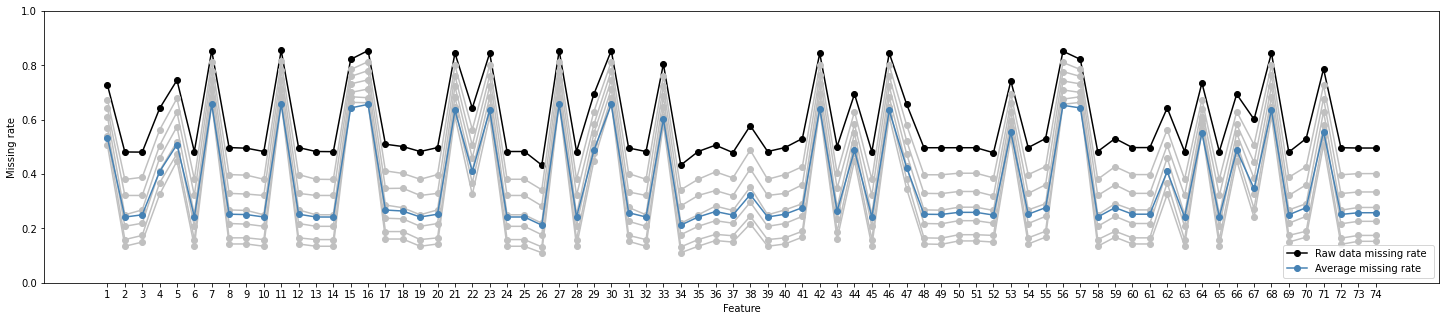

In [78]:
plt.figure(figsize=(25,5))
x=[ i for i in range(1,75)]
plt.plot(x,fmrs[0],c='black',marker='o',label='Raw data missing rate ')
plt.plot(x,fmrs[1],c='silver',marker='o')
plt.plot(x,fmrs[2],c='silver',marker='o')
plt.plot(x,fmrs[3],c='silver',marker='o')
plt.plot(x,fmrs[4],c='silver',marker='o')
plt.plot(x,fmrs[5],c='silver',marker='o')
plt.plot(x,fmrs[6],c='silver',marker='o')
# plt.plot(x,fmrs[7],c='silver',marker='o',label='Missing rate under days interval')
plt.plot(x,avg_feature_missing_rate,c='steelblue',marker='o',label='Average missing rate')
plt.xlabel('Feature')
plt.ylabel('Missing rate')
plt.gca().set_ylim(0,1)
plt.xticks(x)
plt.legend(loc='lower right')
plt.savefig('fmrs.jpg', dpi=300)

In [80]:
feature_index=[]
for i in range(len(avg_feature_missing_rate)):
    if (avg_feature_missing_rate[i]<0.35):
        feature_index.append(i)
feature=[o_columns[feature_index[i]] for i in range(len(feature_index))]

In [82]:
feature

['hemoglobin',
 'Serum chloride',
 'eosinophils(%)',
 'Alkaline phosphatase',
 'albumin',
 'basophil(%)',
 'Total bilirubin',
 'Platelet count',
 'monocytes(%)',
 'indirect bilirubin',
 'Red blood cell distribution width ',
 'neutrophils(%)',
 'total protein',
 'mean corpuscular volume',
 'hematocrit',
 'White blood cell count',
 'mean corpuscular hemoglobin concentration',
 'Urea',
 'lymphocyte count',
 'Red blood cell count',
 'Eosinophil count',
 'Corrected calcium',
 'Serum potassium',
 'glucose',
 'neutrophils count',
 'Direct bilirubin',
 'Mean platelet volume',
 'RBC distribution width SD',
 '(%)lymphocyte',
 'Total cholesterol',
 'aspartate aminotransferase',
 'Uric acid',
 'HCO3-',
 'calcium',
 'Lactate dehydrogenase',
 'platelet large cell ratio ',
 'monocytes count',
 'PLT distribution width',
 'globulin',
 'γ-glutamyl transpeptidase',
 'basophil count(#)',
 'mean corpuscular hemoglobin ',
 'High sensitivity C-reactive protein',
 'serum sodium',
 'thrombocytocrit',
 'glutami

In [84]:
len(feature)

48

In [86]:
interval = 3
forecast = 72
df = pd.read_excel('../data/time_series_375_prerpocess_en.xlsx', index_col=[0])
df_train = read_data_cn(df, interval, forecast)
# interpolate
df_train = df_train.interpolate(method='linear').ffill().bfill() 

In [88]:
df_train

,PATIENT_ID,period,decease,decompensation,Lactate dehydrogenase,High sensitivity C-reactive protein,lymphocyte count
0,1.0,0.0,0.0,0.0,306.0,43.10,0.800000
1,1.0,1.0,0.0,0.0,278.0,23.35,1.295000
2,1.0,2.0,0.0,0.0,250.0,3.60,1.790000
3,1.0,3.0,0.0,0.0,200.0,3.10,1.320000
4,1.0,5.0,0.0,0.0,206.0,2.60,2.500000
...,...,...,...,...,...,...,...
1162,374.0,1.0,1.0,1.0,1867.0,61.70,0.330000
1163,375.0,0.0,1.0,0.0,915.0,58.50,0.510000
1164,375.0,1.0,1.0,0.0,1083.5,128.00,0.523333
1165,375.0,2.0,1.0,0.0,1252.0,197.50,0.536667


In [90]:
creat_batch_data(df_train,'Train_48features')

   time_length  count
0            1     64
1            2     67
2            3     72
3            4     78
4            5     49
